In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Display the first few rows and summary statistics



In [7]:
# Load the dataset

df=pd.read_csv("C:/Users/DELL/Downloads/sample-superstore-subset-excel.csv",encoding='Windows-1252')
df.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,27-07-2011,27-07-2011,998.2023,8,1446.67,88523


In [8]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

# How would you handle missing values in a dataset? Describe at least two methods.

Imputation:

* Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the column. This method is simple and works well when the data distribution is not skewed.
* Forward/Backward Fill: In time-series data, missing values can be filled using the preceding or succeeding values. This is useful for maintaining the sequence of the data.

In [95]:
# Method 1: Imputation - Fill with median

df['Product Base Margin'].fillna(df['Product Base Margin'].median(), inplace=True)

# Method 2: Removal - Drop rows with any missing values
df_dropped = df.dropna()

print(df)
print(df_dropped)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      18606  Not Specified      0.01        2.88           0.50            2   
1      20847           High      0.01        2.84           0.93            3   
2      23086  Not Specified      0.03        6.68           6.15            3   
3      23087  Not Specified      0.01        5.68           3.60            3   
4      23088  Not Specified      0.00      205.99           2.50            3   
...      ...            ...       ...         ...            ...          ...   
9421   20275       Critical      0.06       35.89          14.72         3402   
9422   20276       Critical      0.00        3.34           7.49         3402   
9423   24491  Not Specified      0.08      550.98          45.70         3402   
9424   25914           High      0.10      105.98          13.99         3403   
9425   24492  Not Specified      0.09        7.78           2.50         3403   

        Customer Name      

# Explain why it might be necessary to convert data types before performing an analysis.

* Consistency: Ensures that the data is in a consistent format which is crucial for applying statistical methods accurately.
* Compatibility: Some analyses or machine learning algorithms require data in specific formats (e.g., numeric, categorical).
* Efficiency: Certain data types can be processed faster, making the analysis more efficient and reducing computational resources.

In [96]:
# Convert columns to appropriate data types
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

print(df.dtypes)

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object


C:\Users\suvajk\AppData\Local\Temp\ipykernel_48652\2401492933.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
C:\Users\suvajk\AppData\Local\Temp\ipykernel_48652\2401492933.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')


 # 2. Statistical Analysis:
## What is a T-test, and in what scenarios would you use it? Provide an example based on sales data.

* T-test: A T-test is used to determine if there is a significant difference between the means of two groups.
* Example: To compare average sales before and after a marketing campaign. The null hypothesis would be that there is no difference in sales, and the alternative hypothesis would be that there is a difference.

In [97]:
from scipy import stats

# Sample sales data before and after a marketing campaign
sales_before = [100, 150, 200, 250, 300]
sales_after = [120, 160, 220, 260, 310]

# Perform T-test
t_stat, p_val = stats.ttest_ind(sales_before, sales_after)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -0.2854172544605654, P-value: 0.7825747536400093


## Describe the Chi-square test for independence and explain when it should be used. How would you apply it to test the relationship between shipping mode and customer segment?

* Chi-square test for independence: Used to determine if there is a significant association between two categorical variables.

In [98]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])

# Perform Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, P-value: {p}")

Chi2 Statistic: 1.6522944786735398, P-value: 0.9487444717191827


# 3. Univariate and Bivariate Analysis:
## What is univariate analysis, and what are its key purposes?

* Univariate Analysis: Analysis of a single variable to understand its distribution, central tendency, and dispersion.



# Explain the difference between univariate and bivariate analysis. Provide an example of each.

* Univariate Analysis: Focuses on one variable. Example: Analyzing the distribution of sales in a dataset.
* Bivariate Analysis: Examines the relationship between two variables. Example: Analyzing the relationship between sales and advertising spend.

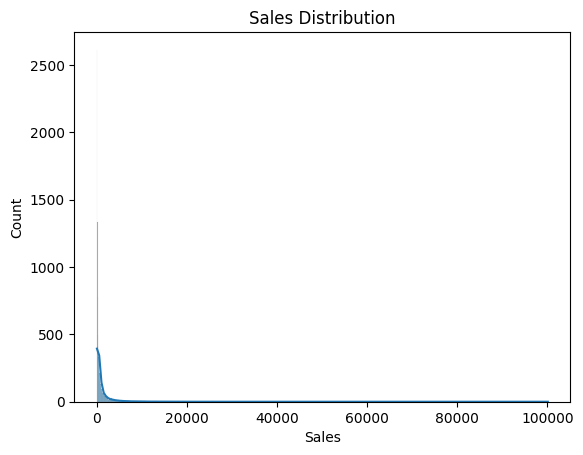

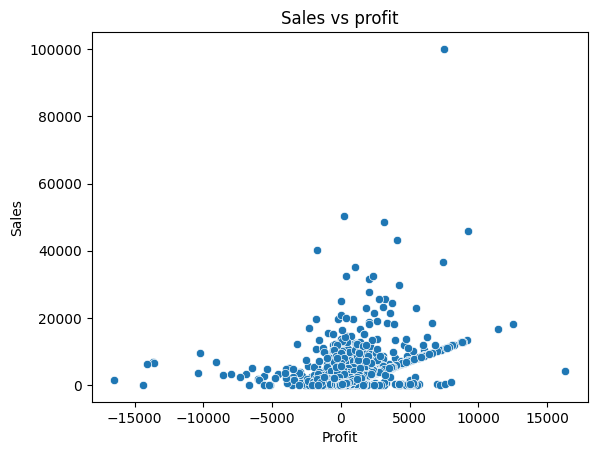

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns



# Univariate Analysis
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Bivariate Analysis
sns.scatterplot(x='Profit', y='Sales', data=df)
plt.title('Sales vs profit')
plt.show()



# 4. Data Visualization:
## What are the benefits of using a correlation matrix in data analysis? How would you interpret the results?

* Benefits:
Identifies relationships between multiple variables simultaneously.
Helps in feature selection by identifying highly correlated variables.
* Interpretation: Values range from -1 to 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no correlation.


C:\Users\suvajk\AppData\Local\Temp\ipykernel_48652\878908452.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


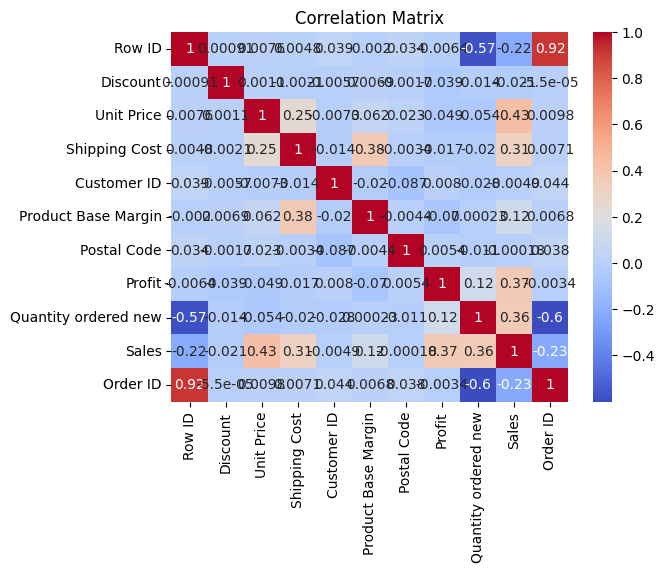

In [100]:
# Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# How would you plot sales trends over time using a dataset? Describe the steps and tools you would use.

## Steps:
* Load the dataset.
* Convert the time variable to a datetime format if necessary.
* Aggregate sales data by time intervals (e.g., weekly, monthly).
* Use tools like Matplotlib or Seaborn in Python to plot the trends.

In [101]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

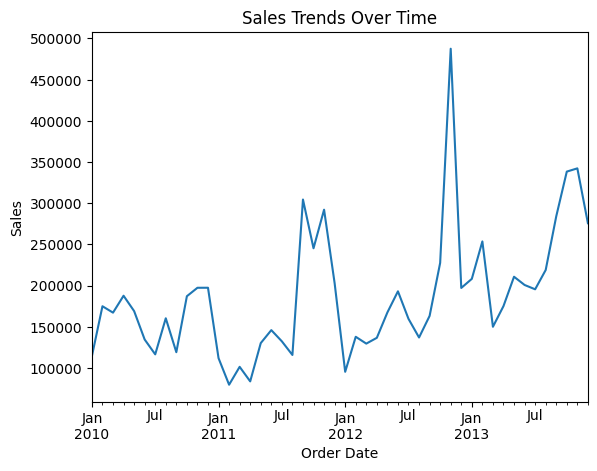

In [102]:

# Plot Sales Trends


df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()
plt.show()



# 5. Sales and Profit Analysis:
## How can you identify top-performing product categories based on total sales and profit? Describe the process.

### Process:
* Aggregate sales and profit data by product category.
* Sort the categories based on total sales and profit.
* Identify the top categories from the sorted list.
* Example: Using  Pandas in Python to group and aggregate the data.


In [103]:

top_categories = df.groupby('Product Category')['Sales', 'Profit'].sum().sort_values(by='Sales', ascending=False)
top_categories

C:\Users\suvajk\AppData\Local\Temp\ipykernel_48652\169495758.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_categories = df.groupby('Product Category')['Sales', 'Profit'].sum().sort_values(by='Sales', ascending=False)


,Sales,Profit
Product Category,,
Technology,3514982.03,683097.884742
Furniture,3178623.74,177354.298188
Office Supplies,2258325.55,451990.216493


# Explain how you would analyze seasonal sales trends using historical sales data.

## Process:
* Aggregate sales data by time period (e.g., month).
* Decompose the time series data into trend, seasonality, and residuals.
* Use tools like statsmodels or seasonal_decompose in Python to analyze the seasonal component.
* Visualize the seasonal patterns to identify trends.

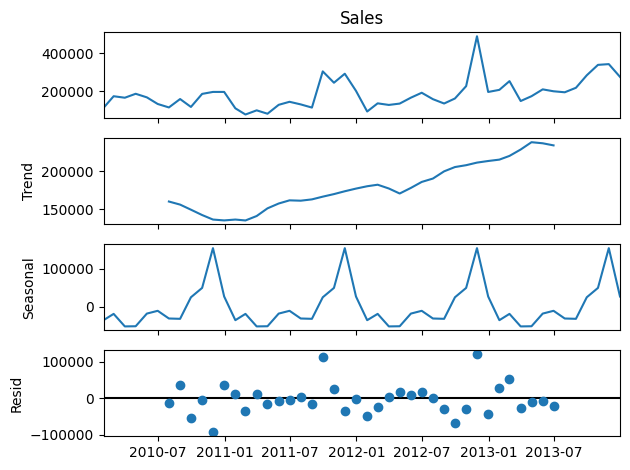

In [104]:
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

In [80]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Ship Date', 'Profit', 'Quantity ordered new',
       'Sales', 'Order ID'],
      dtype='object')

# Grouped Statistics:
## Why is it important to calculate grouped statistics for key variables? Provide an example using regional sales data.
* Grouped statistics provide insights into how different groups contribute to the overall data, identify trends, and make informed decisions.

In [83]:
regional_sales = df.groupby('Region')['Sales'].mean()
regional_sales

Region
Central     876.282035
East       1058.455518
South       817.475036
West       1047.039755
Name: Sales, dtype: float64